In [ ]:
from pyine import *
ema = ema(close, period)

In [ ]:
# https://github.com/StreamAlpha/tvdatafeed
# open cmd and use below command to install tvDatafeed
# pip install tvDatafeed
# and hit Enter


from tvDatafeed import TvDatafeed, Interval

tv = TvDatafeed()

df = tv.get_hist(symbol='BTCUSDT',exchange='BINANCE',interval=Interval.in_1_minute,n_bars=5000)




print(df)

In [ ]:
from datetime import datetime
print()

In [ ]:
data_highs = [(1,2),(3,4),(0,1),(9,10),(6,7),(2,3)]

In [ ]:
ind2 = 3

In [ ]:
highs_d = sorted([(ind_h, p_h) for ind_h, p_h in data_highs if ind_h < ind2], key=lambda y: y[0])

In [ ]:
highs_d

In [ ]:
from math import floor
import trendln

def _calc_dev(base_price, price):
    return 100 * (price - base_price) / base_price


def zigzag(highs, lows, depth=2, dev_threshold=1):


    mins, maxs = trendln.calc_support_resistance((lows, highs), accuracy=8, errpct=0.01)
    
    data_highs = [(x,highs[x]) for x in maxs[0]]
    data_lows = [(y,lows[y]) for y in mins[0]]
    indm = maxs[0]
    print(data_highs[:3])
    print(data_lows[:3])


    raw_pairs = []
    ix = 0
    while ix < len(data_highs):
        ind, p = data_highs[ix]
        print(ind)
        lows_d = sorted([(ind_l, p_l) for ind_l, p_l in data_lows if ind_l > ind], key=lambda x: x[0])
        lows_d.reverse()
        print("No: ", ix)
        if lows_d:
            #break
            status = True
            for lows in lows_d:
                if _calc_dev(lows[1], p) >= dev_threshold:
                    #print(lows_d)
                    #print((ind, p))
                    raw_pairs.append(
                        ((ind, p),
                        (lows[0], lows[1]))
                    )
                    
                    ind2=lows[0]
                    print(ind2)
                    p2=lows[1]
                    highs_d = sorted([(ind_h, p_h) for ind_h, p_h in data_highs if ind_h > ind2], key=lambda y: y[0])
                    highs_d.reverse()
                    if highs_d:
                        #break
                        
                        for highs in highs_d:
                            #print(_calc_dev(p2, highs[1]))
                            if _calc_dev(p2, highs[1]) >= dev_threshold:
                                #print(lows_d)
                                #print((ind, p))
                                raw_pairs.append(
                                    ((ind2, p2),
                                    (highs[0], highs[1]))
                                )
                                print('True')
                                status = False
                                print(highs[0])
                                ix = indm.index(highs[0])
                                break
                    break
            if status:
                break

    result = []
    #print(raw_pairs)
    for (i_h, p_h),(i_l, p_l) in raw_pairs:
        if not result:
            result.append(((i_h, p_h),(i_l, p_l)))
            continue

        if i_l == result[-1][1][0]:
            if p_h > result[-1][0][1]:
                result = result[:-1]
            else:
                continue

        result.append(((i_h, p_h),(i_l, p_l)))
    print(result)
    return result

In [ ]:
                highs_d = sorted([(ind_h, p_h) for ind_h, p_h in data_highs if ind_h > lows[0]], key=lambda y: y[0])
                if lows_d:
                    lows = lows_d[-1]

                    if _calc_dev(lows[1], p) >= dev_threshold:
                        raw_pairs.append(
                            ((ind, p),
                            (lows[0], lows[1]))
                        )

In [ ]:
from math import floor
import trendln

def _calc_dev(base_price, price):
    return 100 * (price - base_price) / base_price


def zigzag(highs, lows, depth=2, dev_threshold=1):


    def pivots(src_raw, length, isHigh):
        src = list(reversed(src_raw))
        bar_index = list(range(len(src)))
        for start in range(len(src)):
            if start + 2 * length + 1 > len(src) - 1:
                return
            p = 0
            if length < len(src) - start:
                p = src[start + length]
            if length == 0:
                yield 0, p
            else:
                isFound = True
                for i in range(start, start + length):
                    if isHigh and src[i] > p:
                        isFound = False
                    if not isHigh and src[i] < p:
                        isFound = False
                for i in range(start + length + 1, start + 2 * length + 1):
                    if isHigh and src[i] >= p:
                        isFound = False
                    c = not isHigh and src[i] <= p
                    if c:
                        isFound = False
                if isFound:
                    yield (bar_index[start + length], p)
                else:
                    yield None, None

    data_highs = [x for x in pivots(highs, floor(depth / 2), True) if x[0]]
    data_lows = [x for x in pivots(lows, floor(depth / 2), False) if x[0]]
    
    len(data_highs)
    raw_pairs = []
    for i, (ind, p) in enumerate(data_highs):
        lows_d = sorted([(ind_l, p_l) for ind_l, p_l in data_lows if ind > ind_l], key=lambda x: x[0])
        if lows_d:
            lows = lows_d[-1]

            if abs(_calc_dev(lows[1], p)) >= dev_threshold:
                raw_pairs.append(
                    ((ind, p),
                     (lows[0], lows[1]))
                )

    result = []

    for (i_h, p_h),(i_l, p_l) in raw_pairs:
        if not result:
            result.append(((i_h, p_h),(i_l, p_l)))
            continue

        if i_l == result[-1][1][0]:
            if p_h > result[-1][0][1]:
                result = result[:-1]
            else:
                continue

        result.append(((i_h, p_h),(i_l, p_l)))
    print(result)
    return result

In [ ]:
from tvDatafeed import TvDatafeed, Interval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tv = TvDatafeed()
def GetDate(df, index):
    return str(list(df["high"].keys())[index])
df = tv.get_hist(symbol='BTCUSDT',exchange='BINANCE',interval=Interval.in_1_minute,n_bars=10000)
df = pd.DataFrame(df)
df.to_csv('data.csv', index=False)
hist1 = df
lenData = len(hist1)
data = {
    "PEAKIndex": [],
    "Time1": [],
    "price1": [],
    "VALLEYIndex": [],
    "Time2": [],
    "price2": [],
}
print(hist1['high'][:3])
for (i_h, p_h),(i_l, p_l) in zigzag(hist1['high'], hist1['low'],depth=500):
    #print(lenData-i_h-1)
    print(f'PEAK Index: {i_h}, Time: {GetDate(hist1,lenData-i_h-1)}, price: {p_h}.......VALLEY Index: {i_l}, Time: {GetDate(hist1,lenData-i_l-1)}, price: {p_l}')
    data["PEAKIndex"].append(i_h)
    data["Time1"].append(GetDate(hist1,lenData-i_h-1))
    data["price1"].append(p_h)
    data["VALLEYIndex"].append(i_l)
    data["Time2"].append(GetDate(hist1,lenData-i_l-1))
    data["price2"].append(p_l)
df = pd.DataFrame(data)
df.to_csv('result.csv', index=False)

In [ ]:
import trendln
# this will serve as an example for security or index closing prices, or low and high prices
import yfinance as yf # requires yfinance - pip install yfinance
tick = yf.Ticker('^GSPC') # S&P500
hist = tick.history(period="max", rounding=True)
h = hist[-500:].Close
mins, maxs = trendln.calc_support_resistance(h, accuracy=8)
minimaIdxs, pmin, mintrend, minwindows = trendln.calc_support_resistance((hist[-500:].Low, None), accuracy=8) #support only
mins, maxs = trendln.calc_support_resistance((hist[-500:].Low, hist[-500:].High), accuracy=8)
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

In [ ]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
df = tv.get_hist(symbol='BTCUSDT',exchange='BINANCE',interval=Interval.in_1_minute,n_bars=10000)
df = pd.DataFrame(df)

In [ ]:
df=df[-500:]

In [ ]:
import matplotlib.pyplot as plt
mins, maxs = trendln.calc_support_resistance((df.low, df.high), accuracy=8, errpct=0.01)


In [ ]:
len(minimaIdxs)

In [ ]:
fig = trendln.plot_support_resistance((df.low, df.high), accuracy=8, errpct=0.01,window=10, pctbound=0.01)

In [ ]:
plt.savefig('suppres.svg', format='svg')
plt.show()
plt.clf() #clear figure

In [ ]:
a = True if 2 > 1 else False

In [ ]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
tv = TvDatafeed()
def GetDate(df, index):
    return str(datetime.fromtimestamp(list(df["volume"].keys())[index].timestamp()))
df = tv.get_hist(symbol='BTCUSDTPERP',exchange='BINANCE',interval=Interval.in_15_minute,n_bars=500)
df = pd.DataFrame(df)
vl = df["high"]
vz = list(df["high"].keys())
print(len(vz))
for v in range(len(vl)):
    if vl[v] == 20170.0:
        print(v)
        print(vz[v])

In [ ]:
zz.zigzag(df['high'], df['low'],depth=2,dev_threshold=1)[0]

In [ ]:
vz[0]

In [ ]:
with open("1.txt", "w+") as writer:
    writer.write(str(hist1["high"]))

In [ ]:
len(vz-3461)

In [ ]:
GetDate(hist1,3477)

In [ ]:
from yahooquery import Ticker
t = Ticker('AAPL')
hist = t.history(period='1y')
for (i_h, p_h),(i_l, p_l) in zigzag(hist['high'], hist['low']):
    print(f'PEAK Index: {i_h}, price: {p_h}, VALLEY Index: {i_l}, price: {p_l}')

In [ ]:
hist1['time']

In [ ]:
hist

In [ ]:
hist1

In [ ]:
hist1['high'][0]

In [ ]:
hist1 = hist

In [127]:
def zigzag(highs, lows, depth=10):
    
    def pivots(src_raw, length, isHigh):
        src = src_raw
        bar_index = list(range(len(src)))
        for start in range(0, len(src)):
            if start + 2 * length + 1 > len(src) - 1:
                return
            p = 0
            if length < len(src) - start:
                p = src[start + length]
                x = src[start:start+1]
            if length == 0:
                yield 0, x
            else:
                isFound = True
                for i in range(start, start + length):
                    if isHigh and src[i] > p:
                        isFound = False
                    if not isHigh and src[i] < p:
                        isFound = False
                for i in range(start + length + 1, start + 2 * length + 1):
                    if isHigh and src[i] >= p:
                        isFound = False
                    c = not isHigh and src[i] <= p
                    if c:
                        isFound = False
                if isFound:
                    yield (bar_index[start + length], x)
                else:
                    yield None, None

    data_highs = [x for x in pivots(highs, floor(depth / 2), True) if x[0]]
    data_lows = [x for x in pivots(lows, floor(depth / 2), False) if x[0]]
    rda = data_highs + data_lows
    rda = sorted([(ind_l, p_l) for ind_l, p_l in data_lows], key=lambda x: x[0])
    rda = [y for x, y in rda]
    value = rda[0]
    index = 1
    while index < len(rda):
        value = value.append(rda[index])
        index += 1
    return value

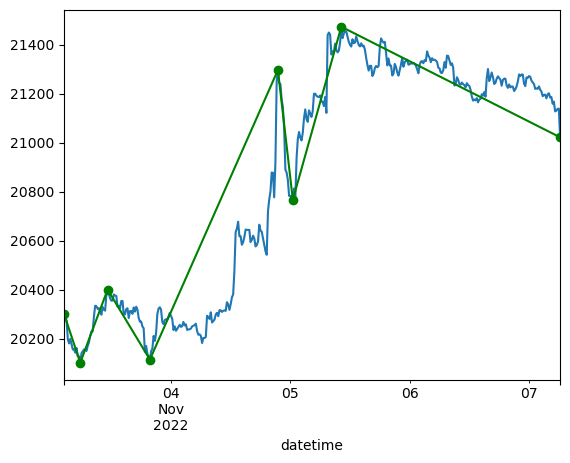

In [133]:
from pandas_datareader import get_data_yahoo
import pandas as pd
from zigzag import *
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
from math import floor
import math
tv = TvDatafeed()
def GetDate(df, index):
    return str(datetime.fromtimestamp(list(df["volume"].keys())[index].timestamp()))
df = tv.get_hist(symbol='BTCUSDTPERP',exchange='BINANCE',interval=Interval.in_15_minute,n_bars=400)
df = pd.DataFrame(df)
#rda = zigzag(df["high"], df["low"], depth=2)

df3 = df["high"].to_frame().merge(df["low"].to_frame(), how='inner', right_index=True, left_index=True)
X = df["high"]
pivots = peak_valley_pivots(X.values, 0.01, -0.01)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
X.plot()
ts_pivots.plot(style='g-o');

In [131]:
ts_pivots

datetime
2022-11-02 01:30:00    20437.3
2022-11-02 23:15:00    20391.5
2022-11-03 01:30:00    20796.0
2022-11-03 05:45:00    20101.1
2022-11-03 11:15:00    20400.0
2022-11-03 19:45:00    20114.0
2022-11-04 21:30:00    21297.0
2022-11-05 00:30:00    20766.8
2022-11-05 10:15:00    21473.7
2022-11-07 06:15:00    21022.1
Name: high, dtype: float64

In [126]:
rda

datetime
2022-11-07 05:00:00    21085.6
2022-11-07 03:30:00    21168.1
2022-11-07 03:00:00    21175.8
2022-11-07 02:15:00    21181.0
2022-11-07 01:00:00    21211.3
                        ...   
2022-11-02 05:00:00    20424.9
2022-11-02 04:30:00    20454.1
2022-11-02 03:45:00    20461.0
2022-11-02 02:30:00    20429.2
2022-11-02 01:30:00    20415.4
Name: low, Length: 121, dtype: float64

In [123]:
rdax

datetime
2022-11-07 05:00:00    21085.6
2022-11-07 01:00:00    21211.3
2022-11-07 00:30:00    21220.9
Name: low, dtype: float64

In [93]:
data_lows

[(2, 20410.1),
 (6, 20424.4),
 (11, 20451.0),
 (14, 20419.4),
 (16, 20423.8),
 (23, 20400.0),
 (31, 20448.3),
 (35, 20490.9),
 (39, 20506.4),
 (42, 20500.0),
 (45, 20463.3),
 (47, 20449.0),
 (52, 20343.4),
 (56, 20400.4),
 (61, 20410.1),
 (63, 20323.0),
 (65, 20356.2),
 (72, 20356.2),
 (74, 20369.4),
 (77, 20352.3),
 (84, 20391.6),
 (88, 20365.2),
 (95, 20146.8),
 (98, 20361.5),
 (100, 20100.0),
 (104, 20091.3),
 (108, 20050.0),
 (114, 20051.0),
 (119, 20111.0),
 (124, 20185.0),
 (128, 20283.3),
 (130, 20267.7),
 (134, 20293.4),
 (137, 20308.3),
 (140, 20330.2),
 (143, 20311.4),
 (146, 20293.3),
 (153, 20240.1),
 (156, 20273.1),
 (158, 20274.3),
 (166, 20038.6),
 (170, 20026.0),
 (172, 20094.6),
 (175, 20077.2),
 (181, 20200.0),
 (184, 20233.6),
 (189, 20212.1),
 (191, 20169.2),
 (196, 20223.5),
 (201, 20208.7),
 (205, 20217.7),
 (208, 20149.2),
 (212, 20152.8),
 (215, 20171.6),
 (220, 20233.3),
 (227, 20270.4),
 (231, 20296.0),
 (234, 20301.0),
 (237, 20332.0),
 (242, 20560.0),
 (244,

In [84]:
arr = df.values
df3['xy'] = arr[~np.isnan(arr)].astype(int)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [78]:
len(data_highs)

123

In [87]:
df["high"][:1]+df["low"][:1]

datetime
2022-11-02 01:00:00    40877.9
dtype: float64

In [70]:
import math
math.isnan(data_highs[0].values[0])

True